## Final Project

In [4]:
#packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

salmonData = np.genfromtxt('fishcount.csv', delimiter = ',', skip_header = 1, skip_footer = 2, usecols=range(1,11)) 
yearSalmonData = salmonData[:,0]
chinook = salmonData[:,1]
coho = salmonData[:,3]
steelhead = salmonData[:,5]


In [5]:
from sklearn.preprocessing import minmax_scale

temperatureData = np.genfromtxt('monthly', delimiter = '\t', skip_header = 45,usecols = range(4,7))
yearTempData = temperatureData[:,0]
month = temperatureData[:,1]
temperature = temperatureData[:,2]
averageTemperatureList = []

x = 1
sum = 0
count = 0
while yearTempData[x] < 2018:   
    while (yearTempData[(x-1)] == yearTempData[x]):        
        if (month[(x-1)]>=4 and month[(x-1)]<=8):
            sum += temperature[x-1]
            count += 1
            x += 1
            continue
        elif(month[(x-1)]<=3 or month[(x-1)]>=9):
            x += 1
    averageTemperatureList.append(round(sum/count,3))
    sum = 0
    count = 0
    x += 1
       
def normalizeListNumpy(listNumpy):
    normalizedList = minmax_scale(listNumpy)
    return normalizedList  

chinookNormal = normalizeListNumpy(chinook)
tempNormal = normalizeListNumpy(averageTemperatureList)
cohoNormal = normalizeListNumpy(coho)
steelheadNormal = normalizeListNumpy(steelhead)
   

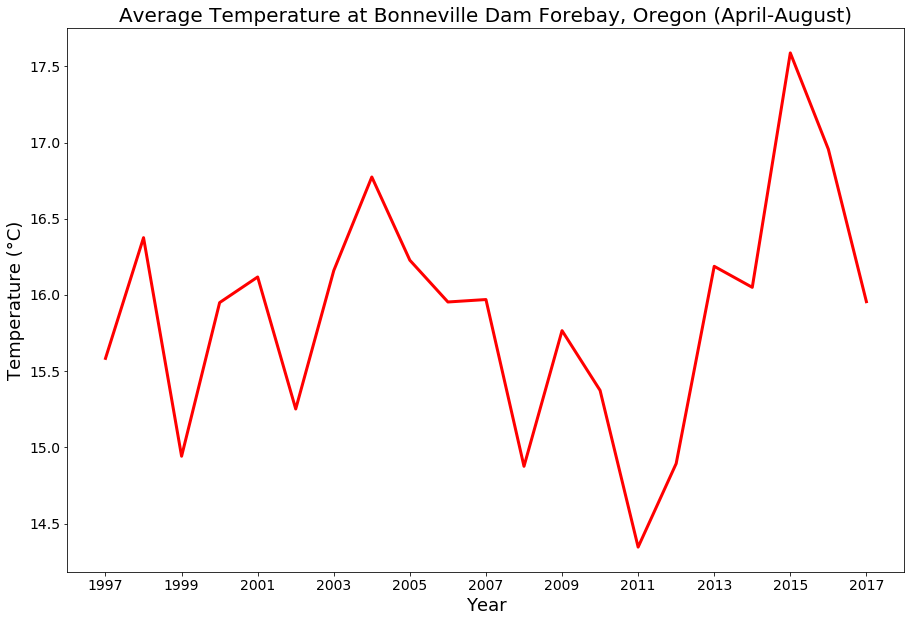

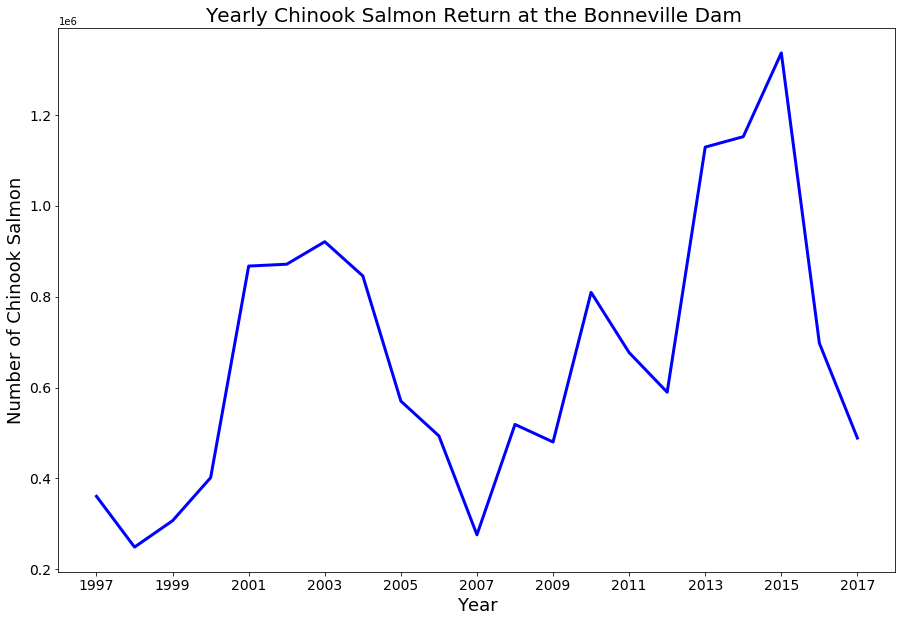

In [6]:
plt.figure(figsize = (15, 10))
plt.plot(yearSalmonData, averageTemperatureList, "r", linewidth = 3)  
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Temperature (\N{DEGREE SIGN}C)", fontsize = 18)
plt.title("Average Temperature at Bonneville Dam Forebay, Oregon (April-August)", fontsize = 20)
plt.xticks(np.arange(1997, 2019, 2))
plt.tick_params(labelsize = 14)

plt.figure(figsize = (15, 10))
plt.plot(yearSalmonData, chinook, 'b',linewidth = 3)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Number of Chinook Salmon", fontsize = 18)
plt.title("Yearly Chinook Salmon Return at the Bonneville Dam ", fontsize = 20)
plt.xticks(np.arange(1997, 2019, 2))
plt.ticklabel_format(style='sci', axis='y', scilimits=(1e5,1.3e6))
plt.tick_params(labelsize = 14)

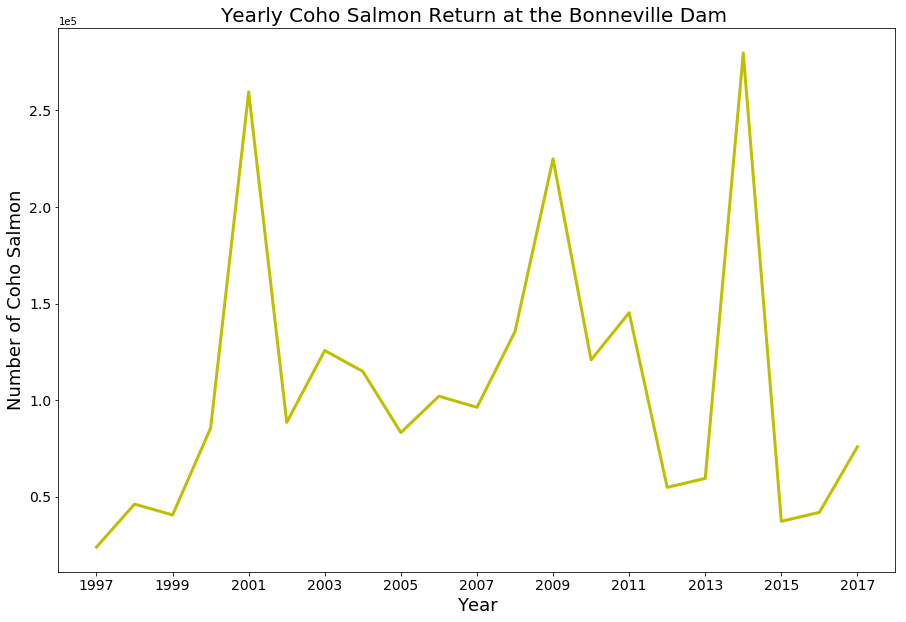

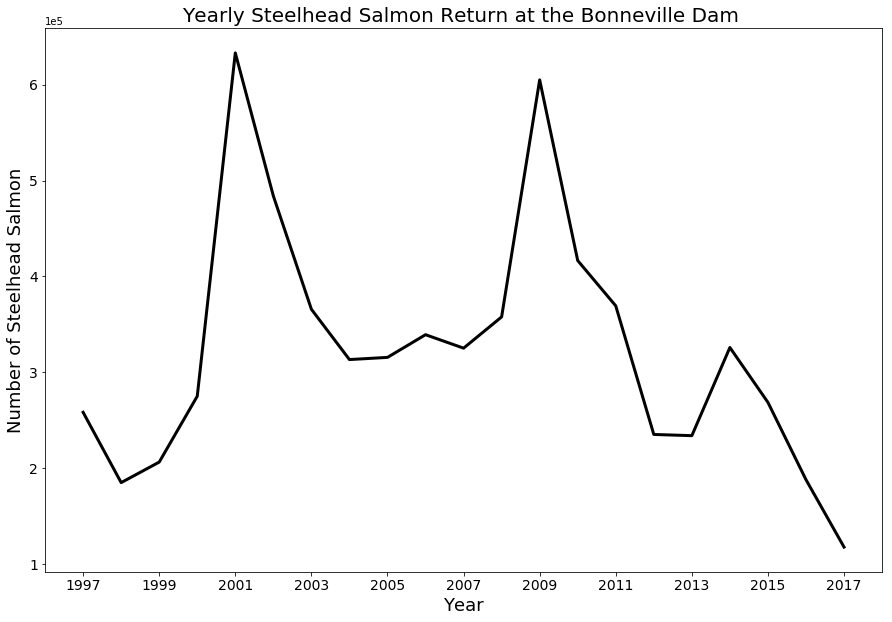

In [7]:
plt.figure(figsize = (15, 10))
plt.plot(yearSalmonData, coho, 'y', linewidth = 3)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Number of Coho Salmon", fontsize = 18)
plt.title("Yearly Coho Salmon Return at the Bonneville Dam ", fontsize = 20)
plt.xticks(np.arange(1997, 2019, 2))
plt.ticklabel_format(style='sci', axis='y', scilimits=(2e4,3e5))
plt.tick_params(labelsize = 14)

plt.figure(figsize = (15, 10))
plt.plot(yearSalmonData, steelhead, 'k', linewidth = 3)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Number of Steelhead Salmon", fontsize = 18)
plt.title("Yearly Steelhead Salmon Return at the Bonneville Dam ", fontsize = 20)
plt.xticks(np.arange(1997, 2019, 2))
plt.ticklabel_format(style='sci', axis='y', scilimits=(1e5,7e5))
plt.tick_params(labelsize = 14)


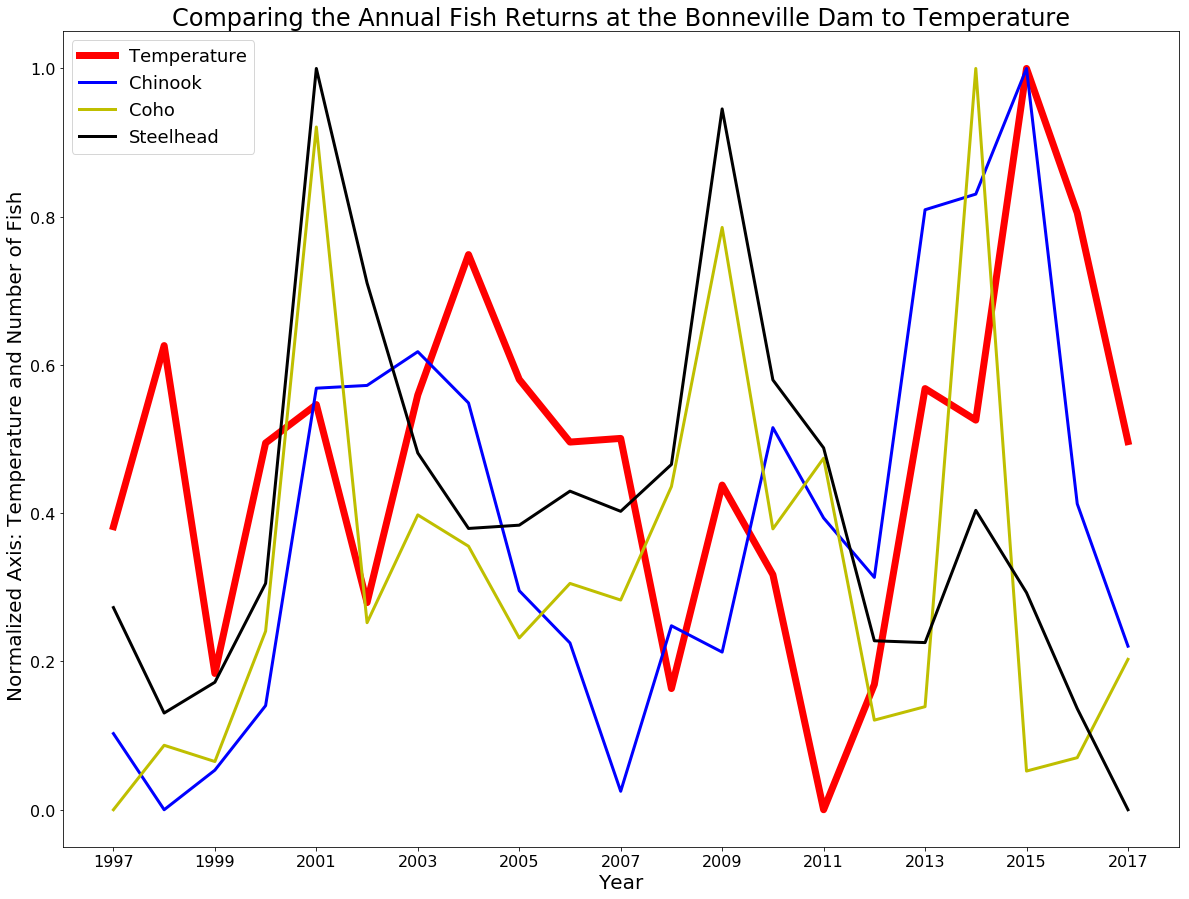

In [8]:
plt.figure(figsize = (20, 15))
plt.plot(yearSalmonData, tempNormal,'r', linewidth = 7, label = 'Temperature')
plt.plot(yearSalmonData, chinookNormal,'b', linewidth = 3, label = 'Chinook')        
plt.plot(yearSalmonData, cohoNormal,'y', linewidth = 3, label = 'Coho')
plt.plot(yearSalmonData, steelheadNormal,'k', linewidth = 3, label = 'Steelhead')
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Normalized Axis: Temperature and Number of Fish  ", fontsize = 20)
plt.title("Comparing the Annual Fish Returns at the Bonneville Dam to Temperature", fontsize = 24)
plt.xticks(np.arange(1997, 2019, 2))
plt.legend(loc = 'upper left', fontsize = 18)
plt.tick_params(labelsize = 16)
